Dans ce notebook, on vise a comparer les algorithmes Label Propagation et Louvain de python.

In [47]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pylab import draw
from networkx.algorithms.community.label_propagation import asyn_lpa_communities 
import time
from memory_profiler import memory_usage
import community #python-louvain package
import pandas as pd
from sklearn.metrics import normalized_mutual_info_score as NMI
from sklearn.metrics import adjusted_rand_score as ARS

from functions import graph_rand_edges

resFold = '../res/'

In [48]:
print("exercice 3: validation")

p = [0.1, 0.3, 0.5, 0.9]
q = 0.1
nb_nodes = [200,400,600,800]
nb_clusters = 4
df = pd.DataFrame(columns=['p', 'q', 'nb_nodes','time_propagation','memory_propagation','time_louvain','memory_louvain'])

for p_i in p:
    for N in nb_nodes :
        G, y = graph_rand_edges(p_i, q, N, nb_clusters)

        # Label propagation
        start_label_prop = time.time()

        init_labels = np.arange(N)
        np.random.shuffle(init_labels)
        label_prop_memory = np.mean(memory_usage((asyn_lpa_communities, (G,))))

        end_label_prop = time.time()

        #Louvain 
        start_louvain = time.time()

        louvain_memory = np.mean(memory_usage((community.best_partition,(G,))))

        end_louvain = time.time()
        
        d = {'p': [p_i], 
             'q':[q],
             'nb_nodes':[N],
             'time_propagation' : [end_label_prop-start_label_prop],
             'memory_propagation': [label_prop_memory],
             'time_louvain' : [end_louvain-start_louvain],
             'memory_louvain': [louvain_memory]
            }
        
        df2 = pd.DataFrame(data = d)
        df = df.append(df2)

df.to_csv(resFold+"compare_algorithms_results.csv",index=False)

exercice 3: validation


## LFR Benchmark

Nous avons prealablement lance ce code dans le terminal (Windows)

/lfr_package/lfrbench_udwov.exe -N 400 -k 5 -maxk 50 -muw 0.1


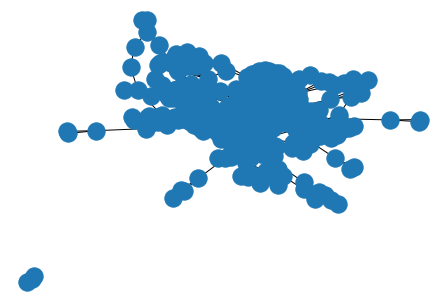

In [49]:
from functions import preprocess_communities, preprocess_edges
pathToData = "./lfr_package/graph/"

# Process data
y = preprocess_communities(pathToData)
edgelist = preprocess_edges(pathToData)

number_nodes = len(y)
number_communities = max(y)

#Generate the graph
G = nx.Graph()
G.add_nodes_from(range(number_nodes))
G.add_edges_from(edgelist)

draw(G)

In [50]:
# Label propagation 
y_init = [randint(0,number_communities-1) for i in range(number_nodes)]
y_label_propagation = asyn_lpa_communities(G)

#processing the results
y_label_propagation_int = np.zeros(number_nodes)
e = 1
lst = list(y_label_propagation)
for c in lst:
    a = list(c)
    for b in a :
        y_label_propagation_int[b] = e
    e += 1

# Louvain
partition = community.best_partition(G)
y_louvain = list(partition.values())

In [40]:
print("Evaluate models\n")
print("NMI")
print('Label Propagation NMI: ' + str(NMI(y,y_label_propagation_int)))
print('Louvain NMI: ' + str(NMI(y,y_louvain)))

print("ARS")
print('Label Propagation ARS: ' + str(ARS(y,y_label_propagation_int)))
print('Louvain ARS: ' + str(ARS(y,y_louvain)))

Evaluate models

NMI
Label Propagation NMI: 0.9082318371218487
Louvain NMI: 0.9158969081699277
ARS
Label Propagation ARS: 0.8707847529663811
Louvain ARS: 0.8647643793097846
